In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('face_feature_BMI.csv')
data

,Unnamed: 0,jawline_width,face_height,cheekbone_width,nose_width,mouth_width,eye_width_left,eye_width_right,eye_symmetry,face_aspect_ratio,...,right_eye_area,left_eyebrow_eye_distance,right_eyebrow_eye_distance,left_eyebrow_slope,right_eyebrow_slope,eyebrow_symmetry,nose_length,nose_to_mouth_ratio,BMI,Sex
0,A00147,202.002475,185.010810,200.000000,37.000000,72.000000,32.062439,32.000000,0.062439,0.915884,...,118.5,27.5,27.0,-0.814815,-0.222222,0.5,67.029844,2.792910,28.971931,Male
1,A00360,138.003623,123.016259,137.032843,25.019992,51.009803,22.022716,24.020824,1.998109,0.891399,...,90.5,14.0,14.5,-0.578947,-0.111111,0.5,50.009999,2.076552,24.658895,Male
2,A00367,183.709009,173.277235,183.847763,39.458839,72.006944,32.388269,31.575307,0.812963,0.943216,...,147.0,34.5,30.5,-1.086956,-0.375000,4.0,65.620119,2.507216,33.224344,Male
3,A01054,126.194295,120.503112,127.192767,31.064449,50.159745,20.223748,22.022716,1.798967,0.954901,...,52.5,26.0,25.5,-1.333333,-0.074074,0.5,44.102154,2.940144,25.996436,Male
4,A01072,174.071824,155.157984,174.103418,43.000000,83.024093,35.000000,35.000000,0.000000,0.891345,...,164.5,29.5,28.5,-0.769231,-0.176471,1.0,59.076222,3.109275,28.793321,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59806,Y25363,198.161550,163.049072,195.207582,40.012498,76.006579,36.013886,34.132096,1.881790,0.822809,...,149.5,27.0,25.5,-0.656250,-0.243243,1.5,64.070274,2.366490,23.707598,Male
59807,Y25364,103.043680,76.006579,99.005050,24.000000,38.000000,18.110770,19.104973,0.994203,0.737615,...,52.0,11.5,11.5,-0.470588,-0.315789,0.0,37.013511,6.084984,20.482830,Female
59808,Y25365,171.011696,149.003356,166.027106,34.000000,69.000000,28.017851,29.017236,0.999385,0.871305,...,87.5,26.5,26.5,-0.600000,-0.281250,0.0,59.033889,4.527693,27.985387,Female
59809,Y25366,125.099960,112.071406,125.099960,27.018512,48.041649,24.083189,24.000000,0.083189,0.895855,...,107.5,15.0,14.5,-0.578947,-0.217391,0.5,49.010203,2.225439,34.453108,Male


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_sex = le.fit_transform(data['Sex'])  # Convert 'male'/'female' to 0/1


In [5]:
# Separate features (X) and target variable (y)
data.dropna(inplace=True)
data = data.drop(data.columns[0], axis=1)
X = data.drop(columns=['BMI','Sex'])  # Replace 'BMI' with the actual BMI column name
y = le.fit_transform(data['Sex'])


In [6]:
# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.columns)

Index(['jawline_width', 'face_height', 'cheekbone_width', 'nose_width',
       'mouth_width', 'eye_width_left', 'eye_width_right', 'eye_symmetry',
       'face_aspect_ratio', 'nose_to_face_height_ratio',
       'eye_to_face_width_ratio', 'jaw_angle', 'nose_to_cheekbone_angle',
       'jawline_curvature', 'face_symmetry', 'mouth_aspect_ratio',
       'jawline_length', 'jawline_ratio', 'left_eye_area', 'right_eye_area',
       'left_eyebrow_eye_distance', 'right_eyebrow_eye_distance',
       'left_eyebrow_slope', 'right_eyebrow_slope', 'eyebrow_symmetry',
       'nose_length', 'nose_to_mouth_ratio'],
      dtype='object')


In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9672419571045576
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.53      0.66       713
           1       0.97      0.99      0.98     11223

    accuracy                           0.97     11936
   macro avg       0.92      0.76      0.82     11936
weighted avg       0.96      0.97      0.96     11936



In [9]:
import joblib

# Save the model
joblib.dump(model, 'sex_prediction_model.pkl')

# Load the model
loaded_model = joblib.load('sex_prediction_model.pkl')


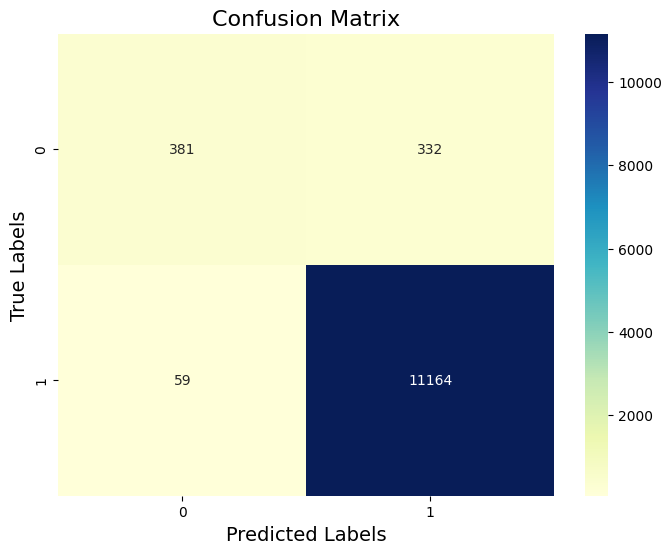

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()


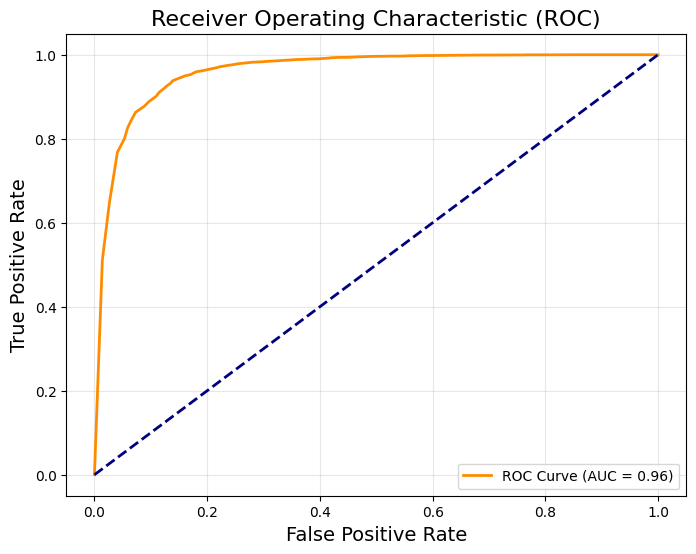

In [11]:
from sklearn.metrics import roc_curve, auc

# Probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC)", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


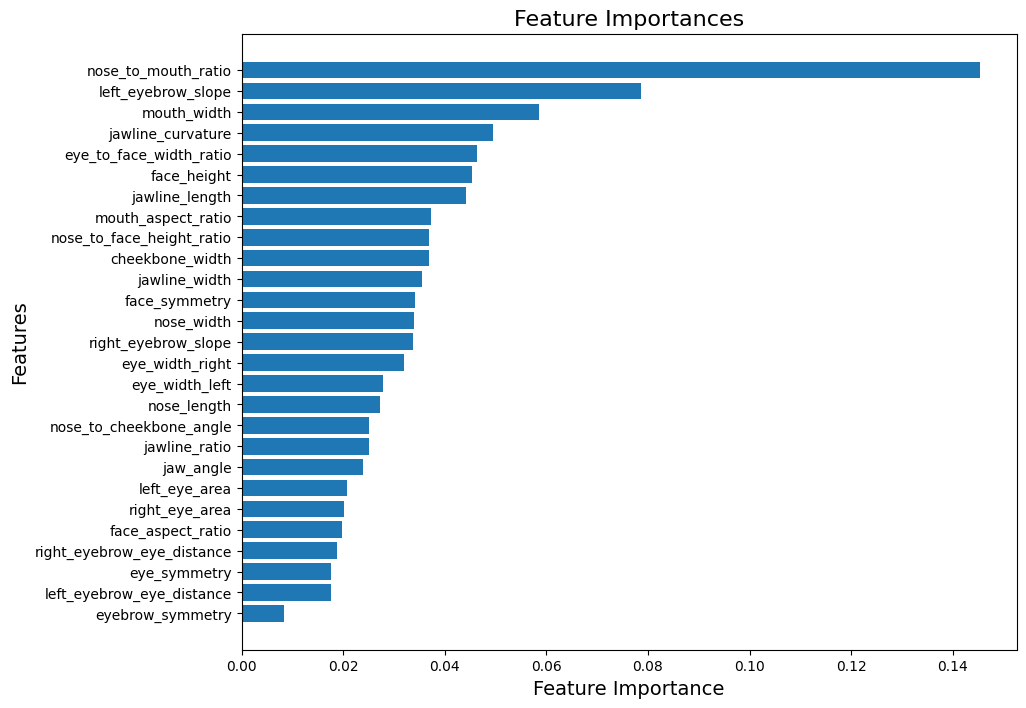

In [12]:
import numpy as np

# Get Feature Importances
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importances", fontsize=16)
plt.show()


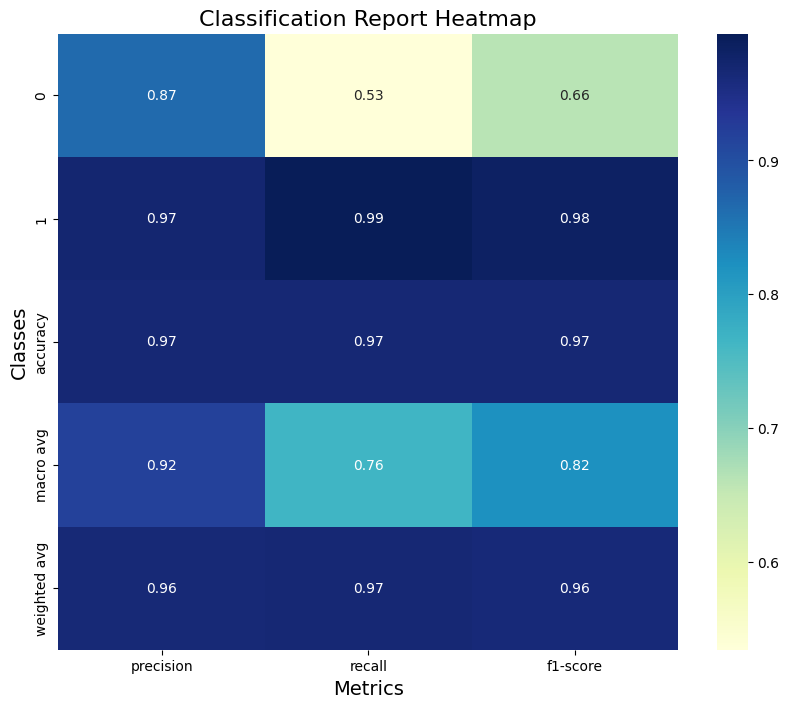

In [14]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).iloc[:-1, :].T

# Plot Classification Report
plt.figure(figsize=(10, 8))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap", fontsize=16)
plt.ylabel("Classes", fontsize=14)
plt.xlabel("Metrics", fontsize=14)
plt.show()
